In [42]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import numpy as np



In [43]:
df = pd.read_csv("socio_economic_data_with_continent.csv")
df.head()

,continent,region,country,year,country_code,fertility_rate,life_expectancy,infant_Mortality,GDP,population
0,Asia,South Asia,Afghanistan,1960,AFG,7.282,32.535,NaN,5.377778e+08,8622466.0
1,Asia,South Asia,Afghanistan,1961,AFG,7.284,33.068,NaN,5.488889e+08,8790140.0
2,Asia,South Asia,Afghanistan,1962,AFG,7.292,33.547,NaN,5.466667e+08,8969047.0
3,Asia,South Asia,Afghanistan,1963,AFG,7.302,34.016,228.9,7.511112e+08,9157465.0
4,Asia,South Asia,Afghanistan,1964,AFG,7.304,34.494,225.1,8.000000e+08,9355514.0


In [44]:
df.dtypes

continent            object
region               object
country              object
year                  int64
country_code         object
fertility_rate      float64
life_expectancy     float64
infant_Mortality    float64
GDP                 float64
population          float64
dtype: object

In [49]:
df.shape

(13545, 10)

# Analysis of Missing values 

In [46]:
# Checking missing values
df.isna().mean()

continent           0.000000
region              0.000000
country             0.000000
year                0.000000
country_code        0.000000
fertility_rate      0.056552
life_expectancy     0.057512
infant_Mortality    0.186194
GDP                 0.229236
population          0.002215
dtype: float64

# visualizing the proportion of the missing values

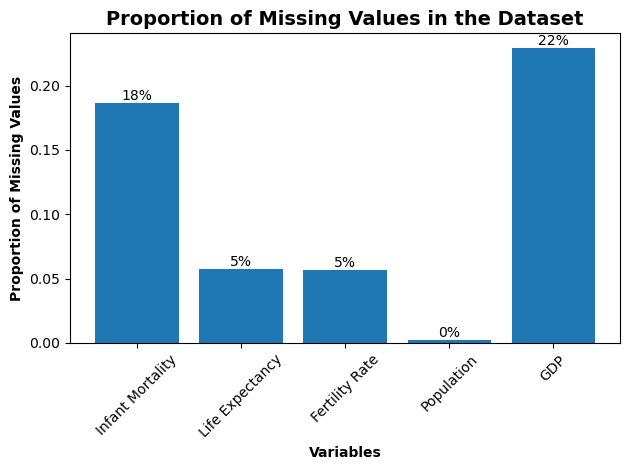

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Proportion of missing values
missing_values = {
    'Infant Mortality': 0.186194,
    'Life Expectancy': 0.057512,
    'Fertility Rate': 0.056552,
    'Population': 0.002215,
    'GDP': 0.229236
}

# Bar chart
fig, ax = plt.subplots()
bars = ax.bar(missing_values.keys(), missing_values.values())

# Add percentage labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{int(yval * 100)}%', ha='center', va='bottom')

# Customize the plot
ax.set_ylabel('Proportion of Missing Values', fontweight='bold')
ax.set_xlabel('Variables', fontweight='bold')
ax.set_title('Proportion of Missing Values in the Dataset', fontweight='bold', fontsize=14)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

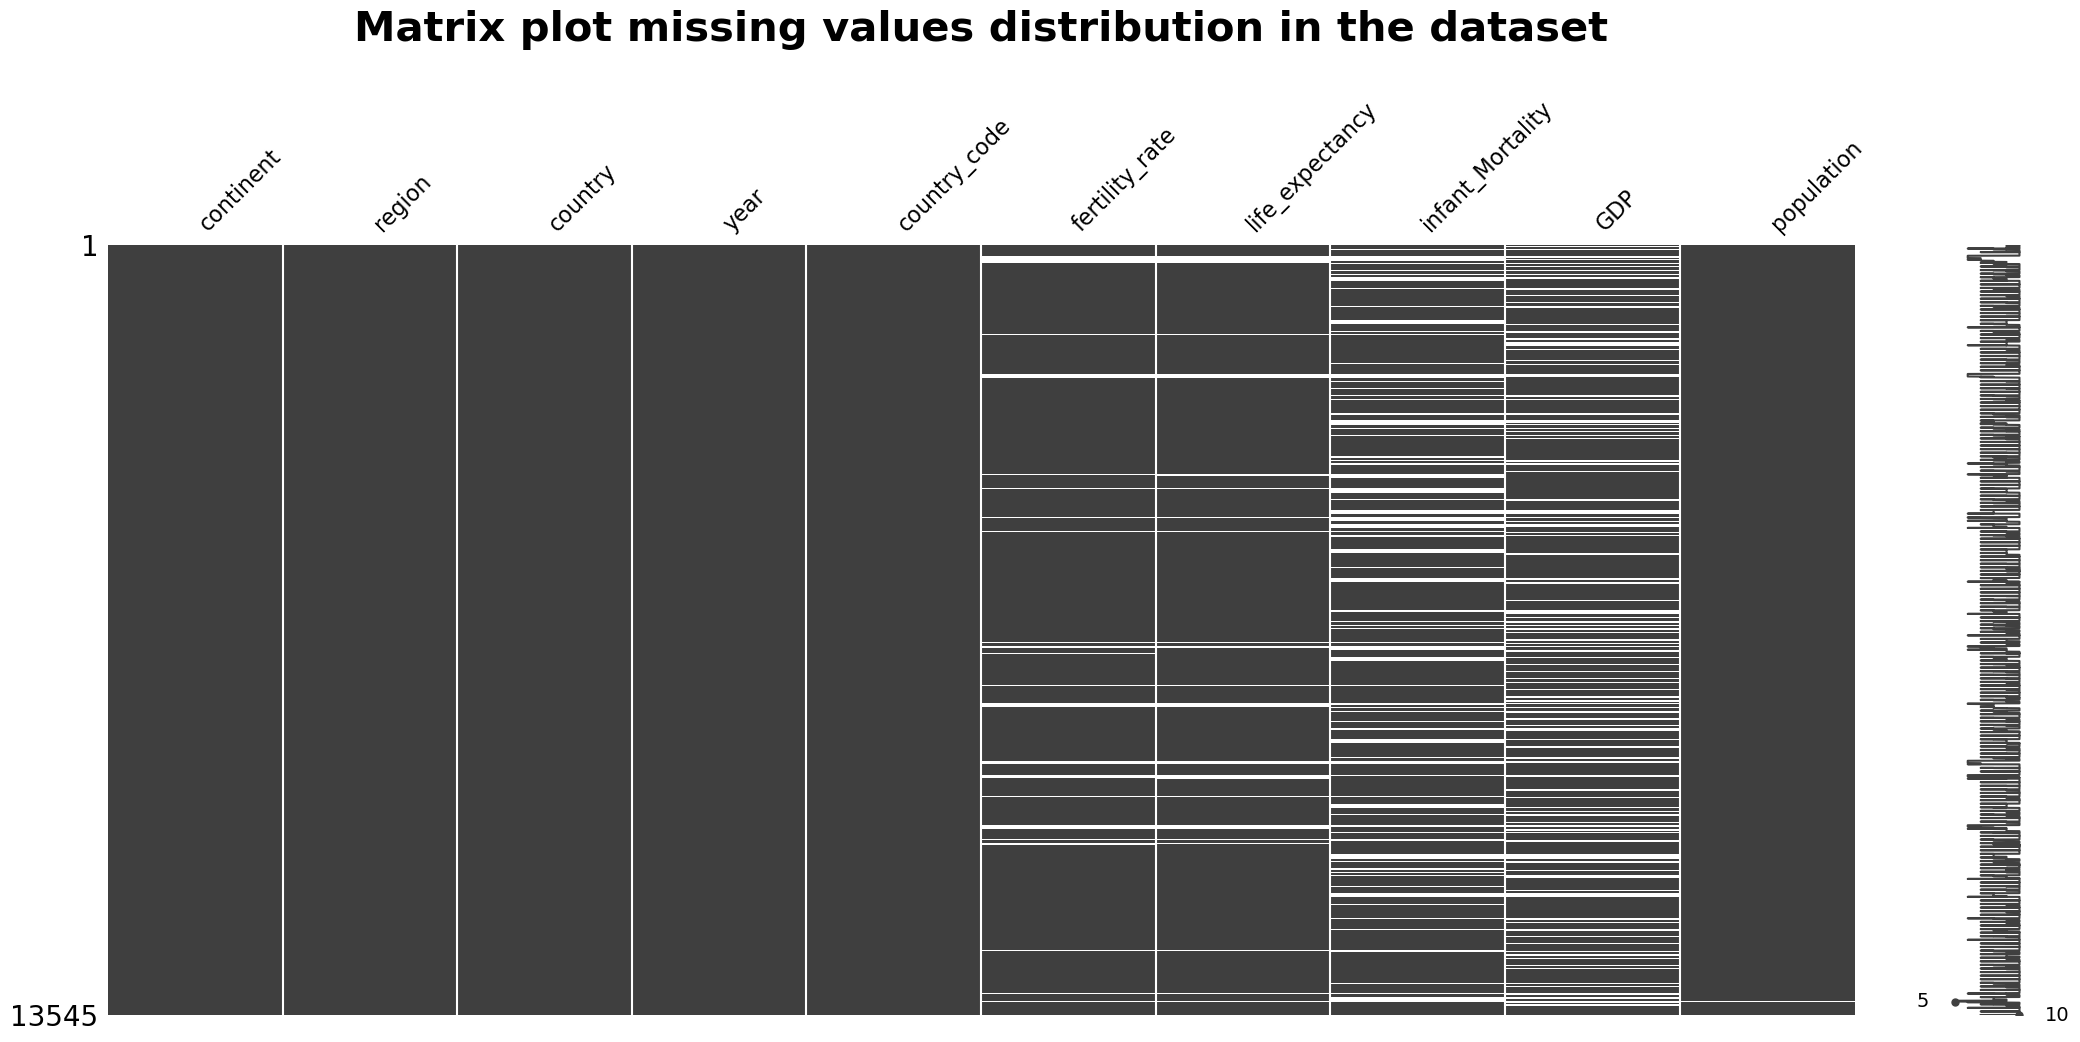

In [48]:
# Analysing the missing values

import missingno as msno

#matrix chart

msno.matrix(df)
plt.rc('font', size=10)
plt.title('Matrix plot missing values distribution in the dataset\n', fontsize=30, fontweight='bold')
plt.show()

## Classification of Missing Values

In [25]:


# Examine missing data patterns
missing_data = df.isnull().sum()
total_data = df.shape[0]
missing_percentage = (missing_data / total_data) * 100

# Calculate the missingness pattern
missingness_pattern = ''
if missing_percentage.mean() == 0:
    missingness_pattern = 'Missing Completely at Random (MCAR)'
elif missing_percentage.mean() < 5:
    missingness_pattern = 'Missing at Random (MAR)'
else:
    missingness_pattern = 'Missing Not at Random (MNAR)'

# Print the missingness pattern
print("Missingness Pattern: ", missingness_pattern)

# Investigate potential reasons for missing values
missing_columns = df.columns[df.isnull().any()].tolist()
for column in missing_columns:
    unique_values = df[column].unique()
    num_missing = df[column].isnull().sum()
    num_unique = len(unique_values)
    print("Column:", column)
    print("Number of Missing Values:", num_missing)
    print("Number of Unique Values:", num_unique)
    print("Unique Values:", unique_values)
    print("\n")

Missingness Pattern:  Missing Not at Random (MNAR)
Column: fertility_rate
Number of Missing Values: 766
Number of Unique Values: 5305
Unique Values: [7.282 7.284 7.292 ... 4.096 4.064 3.771]


Column: life_expectancy
Number of Missing Values: 779
Number of Unique Values: 11436
Unique Values: [32.535 33.068 33.547 ... 61.414 61.124 59.253]


Column: infant_Mortality
Number of Missing Values: 2522
Number of Unique Values: 1713
Unique Values: [  nan 228.9 225.1 ... 108.7 104.1  88.4]


Column: GDP
Number of Missing Values: 3105
Number of Unique Values: 10434
Unique Values: [5.37777811e+08 5.48888896e+08 5.46666678e+08 ... 2.15096984e+10
 2.83712387e+10 2.73666272e+10]


Column: population
Number of Missing Values: 30
Number of Unique Values: 13469
Unique Values: [ 8622466.  8790140.  8969047. ... 15669666. 15993524. 16320537.]




Missingness Pattern:  Missing Not at Random (MNAR)


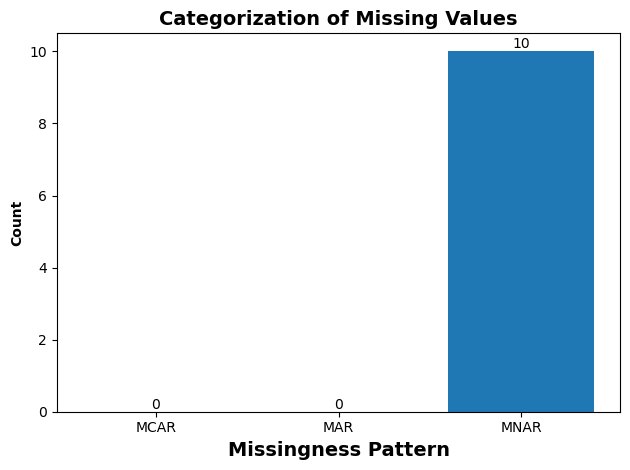

Column: fertility_rate
Number of Missing Values: 766
Number of Unique Values: 5305
Unique Values: [7.282 7.284 7.292 ... 4.096 4.064 3.771]


Column: life_expectancy
Number of Missing Values: 779
Number of Unique Values: 11436
Unique Values: [32.535 33.068 33.547 ... 61.414 61.124 59.253]


Column: infant_Mortality
Number of Missing Values: 2522
Number of Unique Values: 1713
Unique Values: [  nan 228.9 225.1 ... 108.7 104.1  88.4]


Column: GDP
Number of Missing Values: 3105
Number of Unique Values: 10434
Unique Values: [5.37777811e+08 5.48888896e+08 5.46666678e+08 ... 2.15096984e+10
 2.83712387e+10 2.73666272e+10]


Column: population
Number of Missing Values: 30
Number of Unique Values: 13469
Unique Values: [ 8622466.  8790140.  8969047. ... 15669666. 15993524. 16320537.]




In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Examine missing data patterns
missing_data = df.isnull().sum()
total_data = df.shape[0]
missing_percentage = (missing_data / total_data) * 100

# Calculate the missingness pattern
missingness_pattern = ''
if missing_percentage.mean() == 0:
    missingness_pattern = 'Missing Completely at Random (MCAR)'
elif missing_percentage.mean() < 5:
    missingness_pattern = 'Missing at Random (MAR)'
else:
    missingness_pattern = 'Missing Not at Random (MNAR)'

# Print the missingness pattern
print("Missingness Pattern: ", missingness_pattern)

# Visualize the categorization of missing values
categories = ['MCAR', 'MAR', 'MNAR']
counts = [0, 0, 0]

if missingness_pattern == 'Missing Completely at Random (MCAR)':
    counts[0] = len(missing_percentage)
elif missingness_pattern == 'Missing at Random (MAR)':
    counts[1] = len(missing_percentage)
else:
    counts[2] = len(missing_percentage)

# Bar chart
fig, ax = plt.subplots()
bars = ax.bar(categories, counts)

# Add count labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

# Customize the plot
ax.set_ylabel('Count', fontweight='bold')
ax.set_xlabel('Missingness Pattern', fontweight='bold', fontsize=14)
ax.set_title('Categorization of Missing Values', fontweight='bold', fontsize=14)
plt.tight_layout()

# Display the plot
plt.show()

# Investigate potential reasons for missing values
missing_columns = df.columns[df.isnull().any()].tolist()
for column in missing_columns:
    unique_values = df[column].unique()
    num_missing = df[column].isnull().sum()
    num_unique = len(unique_values)
    print("Column:", column)
    print("Number of Missing Values:", num_missing)
    print("Number of Unique Values:", num_unique)
    print("Unique Values:", unique_values)
    print("\n")

# Handling Missing values

In [36]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Create a copy of the dataframe for imputation
df_imputed = df.copy()

# Specify the columns to be imputed 
columns_to_impute = df_imputed.columns[5:]

# Initialize the IterativeImputer
iterimp = IterativeImputer()

# Fit the imputer to the selected columns and impute missing values
df_imputed[columns_to_impute] = iterimp.fit_transform(df_imputed[columns_to_impute])


In [37]:
df_imputed.head()

,continent,region,country,year,country_code,fertility_rate,life_expectancy,infant_Mortality,GDP,population
0,Asia,South Asia,Afghanistan,1960,AFG,7.282,32.535,169.373084,5.377778e+08,8622466.0
1,Asia,South Asia,Afghanistan,1961,AFG,7.284,33.068,167.579287,5.488889e+08,8790140.0
2,Asia,South Asia,Afghanistan,1962,AFG,7.292,33.547,165.988238,5.466667e+08,8969047.0
3,Asia,South Asia,Afghanistan,1963,AFG,7.302,34.016,228.900000,7.511112e+08,9157465.0
4,Asia,South Asia,Afghanistan,1964,AFG,7.304,34.494,225.100000,8.000000e+08,9355514.0


In [38]:
df_imputed.shape

(13545, 10)

In [40]:
df_imputed.isna().mean()

continent           0.0
region              0.0
country             0.0
year                0.0
country_code        0.0
fertility_rate      0.0
life_expectancy     0.0
infant_Mortality    0.0
GDP                 0.0
population          0.0
dtype: float64

In [41]:
# save the cleaned dataset

df_imputed.to_csv('cleaned_socio_economic_indicators_data.csv', index=False)